# Machine learning techniques for diagnosis of malignant pleural mesothelioma

MPM is a highly aggressive tumor of the serous membranes, which in humans results from exposure to **asbestos** and **asbestiform fibers**. It is a fatal cancer and a malignancy that is resistant to the common tumor directed therapies.

Overall: 
* around half of people diagnosed with mesothelioma will live at least a year after the diagnosis
* around 10% of people with mesothelioma will live at least 5 years after diagnosis

The symptoms of mesothelioma develop usually gradually over time and don't appear until several decades (typically 20 years) after exposure to asbestos ! For mesothelioma in the lining of the lungs, they include :
* chest pain
* shortness of breath
* fatigue
* fever and sweating
* couch
* loss of appetite and unexplained weight loss
* swollen fingertips

As for mesothelioma in the lining of the tummy, they include :
* swelling or tummy pain
* feeling sick
* loss of appetite and unexplained weight loss
* diarrhoea or consitupation

Diagnostics of mesothelioma:
* X-ray of chest or tummy
* CT scan
* fluid drainage
* thoracoscopy or laparoscopy

## Findings in the studied paper 

The paper compares the results of the multilayer neural network (MLNN) structure and Artificial Immune Systems (AIS) on MPM diagnosis. The dataset used comes from a faculty of medecine's database using patient's hospital reports. This dataset includes 324 patients suffering from variety of MPM disease. Each of them have 34 features and diagnostic tests of each patient were recorded by an attending physician.

## Data importation

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

from mca import MCA # pip install --user mca
# doc: https://github.com/esafak/mca/blob/master/docs/usage.rst

# configuration bibliotheque pour les graphiques
%matplotlib inline 

os.getcwd()

'/Users/romanelgff/Documents/Master/M2/S1/R1/ML/ml-mesothelioma'

In [2]:
df = pd.read_excel("mesothelioma_dataset.xlsx")
df = df.drop(columns = ["diagnosis method"]) # variable correlee avec la variable explicative donc a enlever (d'apres Valérie)
df.head()

,age,gender,city,asbestos exposure,type of MM,duration of asbestos exposure,keep side,cytology,duration of symptoms,dyspnoea,...,pleural lactic dehydrogenise,pleural protein,pleural albumin,pleural glucose,dead or not,pleural effusion,pleural thickness on tomography,pleural level of acidity (pH),C-reactive protein (CRP),class of diagnosis
0,47.0,1,0,1,0.0,20.0,0,1,24.0,1,...,289.0,0.0,0.00,79.0,1,0.0,0.0,0.0,34,1
1,55.0,1,0,1,0.0,45.0,0,0,1.0,1,...,7541.0,1.6,0.80,6.0,1,1.0,1.0,1.0,42,1
2,29.0,1,1,1,0.0,23.0,1,0,1.0,0,...,480.0,0.0,0.00,90.0,1,0.0,0.0,0.0,43,2
3,39.0,1,0,1,0.0,10.0,0,0,3.0,0,...,459.0,5.0,2.80,45.0,1,1.0,0.0,0.0,21,1
4,47.0,1,0,1,0.0,10.0,1,1,1.5,1,...,213.0,3.6,1.95,53.0,1,1.0,0.0,0.0,11,1


In [3]:
# dimensions
df.shape 

(324, 34)

In [4]:
# nombre total d'éléments
df.size

11016

In [5]:
# removing blank spaces in column names
df.columns = df.columns.str.replace(' ', '_')
df.head()

,age,gender,city,asbestos_exposure,type_of_MM,duration_of_asbestos_exposure,keep_side,cytology,duration_of_symptoms,dyspnoea,...,pleural_lactic_dehydrogenise,pleural_protein,pleural_albumin,pleural_glucose,dead_or_not,pleural_effusion,pleural_thickness_on_tomography,pleural_level_of_acidity_(pH),C-reactive_protein_(CRP),class_of_diagnosis
0,47.0,1,0,1,0.0,20.0,0,1,24.0,1,...,289.0,0.0,0.00,79.0,1,0.0,0.0,0.0,34,1
1,55.0,1,0,1,0.0,45.0,0,0,1.0,1,...,7541.0,1.6,0.80,6.0,1,1.0,1.0,1.0,42,1
2,29.0,1,1,1,0.0,23.0,1,0,1.0,0,...,480.0,0.0,0.00,90.0,1,0.0,0.0,0.0,43,2
3,39.0,1,0,1,0.0,10.0,0,0,3.0,0,...,459.0,5.0,2.80,45.0,1,1.0,0.0,0.0,21,1
4,47.0,1,0,1,0.0,10.0,1,1,1.5,1,...,213.0,3.6,1.95,53.0,1,1.0,0.0,0.0,11,1


Details on: https://www.overleaf.com/2229811927sftxcwqrxthn

Résultats recherches en Fr de certaines variables:
* **city**: où habite le patient (plus ou moins proche de la ville)
* **asbestos exposure**: exposition à l'amiante, un silicate fibreux d’origine naturelle
* **cytology**: dépistage par cytologie (= étude des cellules isolées)
* **White Blood cell count (WBC)**: quantité de globule blanc
* **haemoglobin (HGB)**: 0 ou 1 = anémie ou non??
* **platelet count (PLT)**: nombre de plaquettes (thrombocytes) (low platelet concentration is called thrombocytopenia, and is due to either decreased production or increased destruction. Elevated platelet concentration is called thrombocytosis, and is either congenital, reactive (to cytokines), or due to unregulated production)
* **sedimentation**:  sedimentation rate = blood test that checks for inflammation in your body (measures how fast red blood cells fall to the bottom of a tube. Inflammation creates proteins that make red blood cells fall more quickly)
* **blood lactic dehydrogenise (LDH)**: taux de LDH ou Lactate déshydrogénase (type de protéine aussi appelé enzyme), quand des tissus sont endommagés ou malades, ils relâchent des isoenzymes de LDH dans le sang => le type de LDH rejetté dépend du tissu endommagé
* **alkaline phosphatise (ALP)**: enzyme présente dans le sang, si le taux présent est élevé => problème éventuel = foie, hépatite, obstruction des voies biliaires, cirrhose ou problèmes au niveau des os
* **total protein**: quantité totale de protéine (albumin+globulin) dans le sang (normal values = 6.0 to 8.3 grams per deciliter)

In [6]:
# column types
df.dtypes # some issue with type of categorical/boolean variables

age                                 float64
gender                                int64
city                                  int64
asbestos_exposure                     int64
type_of_MM                          float64
duration_of_asbestos_exposure       float64
keep_side                             int64
cytology                              int64
duration_of_symptoms                float64
dyspnoea                              int64
ache_on_chest                         int64
weakness                              int64
habit_of_cigarette                    int64
performance_status                    int64
white_blood                         float64
cell_count_(WBC)                      int64
hemoglobin_(HGB)                      int64
platelet_count_(PLT)                float64
sedimentation                       float64
blood_lactic_dehydrogenise_(LDH)    float64
alkaline_phosphatise_(ALP)          float64
total_protein                       float64
albumin                         

In [7]:
df["class_of_diagnosis"].unique() # target variable (boolean)

array([1, 2])

In [8]:
df["class_of_diagnosis"] = df["class_of_diagnosis"].apply(lambda x: 1 if x == 2 else 0)

In [9]:
df["city"].unique()

array([0, 1, 3, 4, 5, 2, 6, 7, 8])

In [10]:
df["type_of_MM"].unique() # float instead of int

array([0., 1., 2.])

In [11]:
df["type_of_MM"] = df["type_of_MM"].astype('int')

In [12]:
df["pleural_level_of_acidity_(pH)"].unique() # same

array([0., 1.])

In [13]:
df["pleural_level_of_acidity_(pH)"] = df["pleural_level_of_acidity_(pH)"].astype('int')

In [14]:
df["keep_side"].unique() # keep_side is lung_side in another paper using the same data

array([0, 1, 2])

In [15]:
df = df.rename(columns={'keep_side':'lung_side'}) # changing name
df.lung_side # 0 = no pleural plaque (1 or 2 = right or left side of the lung)

0      0
1      0
2      1
3      0
4      1
      ..
319    1
320    1
321    0
322    1
323    1
Name: lung_side, Length: 324, dtype: int64

In [16]:
df["cytology"].unique() # boolean

array([1, 0])

In [17]:
df["gender"].unique() # category

array([1, 0])

In [18]:
df["habit_of_cigarette"].unique() # categoryy

array([2, 3, 0, 1])

In [19]:
df["pleural_effusion"].unique() # boolean (need to be converted in int type)

array([0., 1.])

In [20]:
df["pleural_effusion"] = df["pleural_effusion"].astype('int')

In [21]:
df["pleural_thickness_on_tomography"].unique() # boolean (need to be converted in int type)

array([0., 1.])

In [22]:
df["pleural_thickness_on_tomography"] = df["pleural_thickness_on_tomography"].astype('int')

In [23]:
df["hemoglobin_(HGB)"].unique() # boolean

array([1, 0])

In [24]:
df["performance_status"].unique() # boolean

array([1, 0])

In [25]:
df["weakness"].unique() # boolean

array([0, 1])

In [26]:
df["ache_on_chest"].unique() # boolean

array([1, 0])

In [27]:
df["dyspnoea"].unique() # boolean

array([1, 0])

In [28]:
df["asbestos_exposure"].unique() # boolean

array([1, 0])

In [29]:
df.info() # no NA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 34 columns):
age                                 324 non-null float64
gender                              324 non-null int64
city                                324 non-null int64
asbestos_exposure                   324 non-null int64
type_of_MM                          324 non-null int64
duration_of_asbestos_exposure       324 non-null float64
lung_side                           324 non-null int64
cytology                            324 non-null int64
duration_of_symptoms                324 non-null float64
dyspnoea                            324 non-null int64
ache_on_chest                       324 non-null int64
weakness                            324 non-null int64
habit_of_cigarette                  324 non-null int64
performance_status                  324 non-null int64
white_blood                         324 non-null float64
cell_count_(WBC)                    324 non-null int64
hemoglo

In [30]:
df.describe()

,age,gender,city,asbestos_exposure,type_of_MM,duration_of_asbestos_exposure,lung_side,cytology,duration_of_symptoms,dyspnoea,...,pleural_lactic_dehydrogenise,pleural_protein,pleural_albumin,pleural_glucose,dead_or_not,pleural_effusion,pleural_thickness_on_tomography,pleural_level_of_acidity_(pH),C-reactive_protein_(CRP),class_of_diagnosis
count,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,...,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000,324.000000
mean,54.743827,0.586420,2.530864,0.864198,0.052469,30.188272,0.759259,0.280864,5.442901,0.817901,...,518.472222,3.937562,2.076883,48.444444,0.944444,0.870370,0.595679,0.521605,64.188272,0.296296
std,11.002637,0.493237,2.429623,0.343109,0.261622,16.419945,0.565308,0.450116,4.717792,0.386523,...,536.279128,1.575008,0.915411,27.232516,0.229416,0.336415,0.491519,0.500306,22.661837,0.457330
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,...,110.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,11.000000,0.000000
25%,47.000000,0.000000,0.000000,1.000000,0.000000,19.750000,0.000000,0.000000,2.875000,1.000000,...,322.000000,3.400000,1.607500,29.000000,1.000000,1.000000,0.000000,0.000000,42.000000,0.000000
50%,55.000000,1.000000,2.000000,1.000000,0.000000,34.000000,1.000000,0.000000,5.000000,1.000000,...,510.000000,4.200000,2.200000,38.000000,1.000000,1.000000,1.000000,1.000000,68.000000,0.000000
75%,63.000000,1.000000,5.000000,1.000000,0.000000,43.000000,1.000000,1.000000,7.000000,1.000000,...,545.000000,4.925000,2.725000,75.000000,1.000000,1.000000,1.000000,1.000000,79.000000,1.000000
max,85.000000,1.000000,8.000000,1.000000,2.000000,70.000000,2.000000,1.000000,52.000000,1.000000,...,7541.000000,6.700000,4.400000,151.000000,1.000000,1.000000,1.000000,1.000000,103.000000,1.000000


In [31]:
# changing names of columns with brackets in it
df = df.rename(columns={'platelet_count_(PLT)':'platelet_count'}) # changing name
df = df.rename(columns={'cell_count_(WBC)':'cell_count'}) # changing name
df = df.rename(columns={'hemoglobin_(HGB)':'hemoglobin'}) # changing name
df = df.rename(columns={'blood_lactic_dehydrogenise_(LDH)':'blood_lactic_dehydrogenise'}) 
df = df.rename(columns={'alkaline_phosphatise_(ALP)':'alkaline_phosphatise'}) 
df = df.rename(columns={'pleural_level_of_acidity_(pH)':'pleural_level_of_acidity'}) 
df = df.rename(columns={'C-reactive_protein_(CRP)':'C_reactive_protein'}) 

In [32]:
# converting categorical variables into "Categorical" pandas type
df["city"] = pd.Categorical(df["city"], ordered=False)
df["type_of_MM"] = pd.Categorical(df["type_of_MM"], ordered=False)
df["lung_side"] = pd.Categorical(df["lung_side"], ordered=False)
df["habit_of_cigarette"] = pd.Categorical(df["habit_of_cigarette"], ordered=False)
df["gender"] = pd.Categorical(df["gender"])
df["performance_status"] = pd.Categorical(df["performance_status"], ordered=False)

## Descriptive stats

### Univariate stats

In [33]:
# library & dataset
import seaborn as sns

# style 
sns.set(style="darkgrid")

In [34]:
df["type_of_MM"].value_counts() # more people with 0 as type of MM (which stands for no MM)

0    310
1     11
2      3
Name: type_of_MM, dtype: int64

In [35]:
df["class_of_diagnosis"].value_counts() # 96 non-healthy for 228 healthy

0    228
1     96
Name: class_of_diagnosis, dtype: int64

In [36]:
print("{:.2f}% healthy and {:.2f}% non healthy in the dataset".format(228/(228+96)*100,
                                                            96/(229+96)*100))

70.37% healthy and 29.54% non healthy in the dataset


In [37]:
# type_of_MM has information only on 14 out of 96 patients on the type of MM
# so we will remove it from the dataset
df = df.drop("type_of_MM", axis=1)

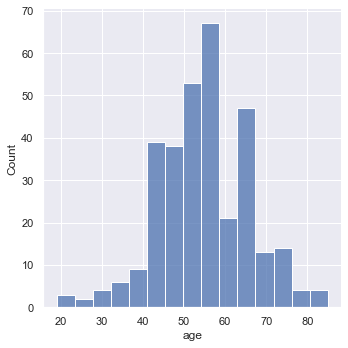

In [38]:
sns.displot(df, x="age")

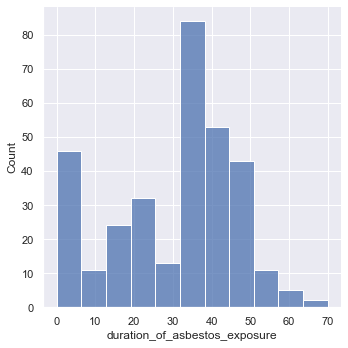

In [39]:
sns.displot(df, x="duration_of_asbestos_exposure")

### Statistiques bivariées

In [40]:
pd.crosstab(df["class_of_diagnosis"], df["asbestos_exposure"]) 

asbestos_exposure,0,1
class_of_diagnosis,,
0,35,193
1,9,87


In [41]:
pd.crosstab(df["class_of_diagnosis"], df["dead_or_not"]) # more healthy (diagnosis=1) that die than not healthy, strange

dead_or_not,0,1
class_of_diagnosis,,
0,14,214
1,4,92


### Graphic representations

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


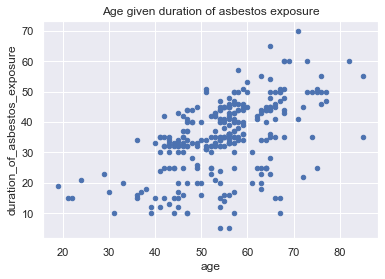

In [42]:
var = df[df["asbestos_exposure"] == 1]

var.plot.scatter(title="Age given duration of asbestos exposure",
         x="age",
         y="duration_of_asbestos_exposure")

In [43]:
# dataframe with dummys
dc = pd.DataFrame(pd.get_dummies(df.drop('class_of_diagnosis', axis=1)))
dc.head()

,age,asbestos_exposure,duration_of_asbestos_exposure,cytology,duration_of_symptoms,dyspnoea,ache_on_chest,weakness,white_blood,cell_count,...,city_8,lung_side_0,lung_side_1,lung_side_2,habit_of_cigarette_0,habit_of_cigarette_1,habit_of_cigarette_2,habit_of_cigarette_3,performance_status_0,performance_status_1
0,47.0,1,20.0,1,24.0,1,1,0,8050.0,9,...,0,1,0,0,0,0,1,0,0,1
1,55.0,1,45.0,0,1.0,1,1,1,11200.0,7,...,0,1,0,0,0,0,0,1,1,0
2,29.0,1,23.0,0,1.0,0,0,0,5300.0,12,...,0,0,1,0,0,0,1,0,0,1
3,39.0,1,10.0,0,3.0,0,1,1,7910.0,14,...,0,1,0,0,1,0,0,0,0,1
4,47.0,1,10.0,1,1.5,1,1,0,9120.0,4,...,0,0,1,0,0,0,0,1,0,1


### Correlation matrix

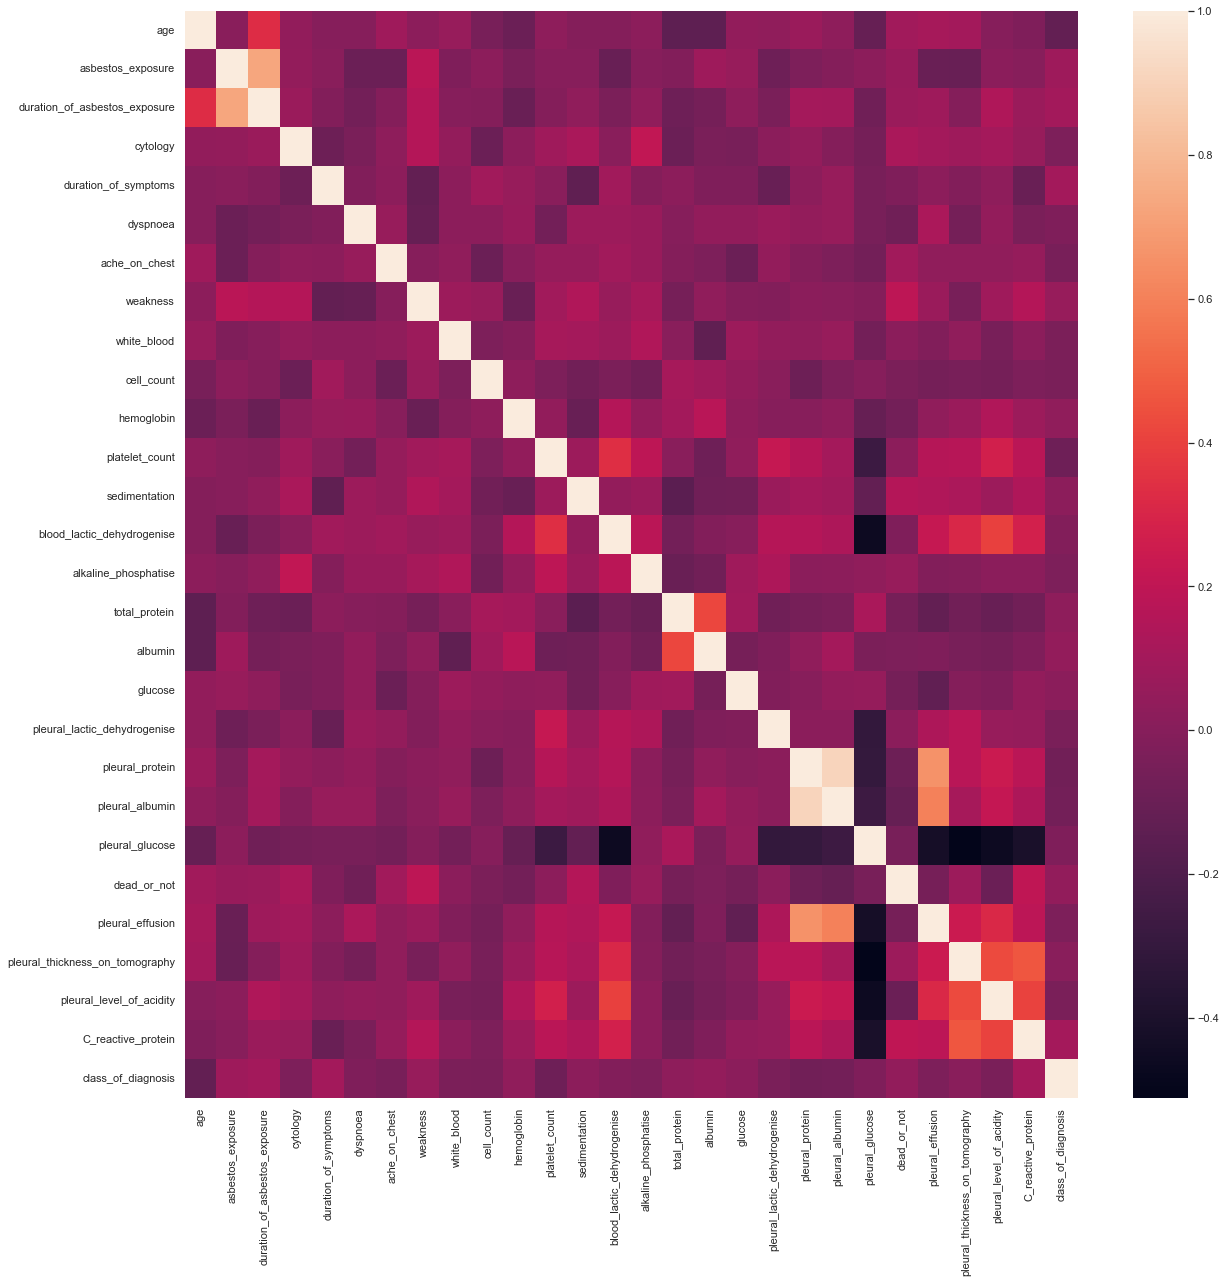

In [44]:
import seaborn as sns

corrMatrix = df.select_dtypes(include='number').corr()

plt.rcParams['figure.figsize'] = [20, 20]
sns.heatmap(corrMatrix)
plt.show() 

### Cramer's V

Measure of association between two nominal variables. Gives a value between 0 (no association) and +1. It is based on Pearson's chi-squared statistic.

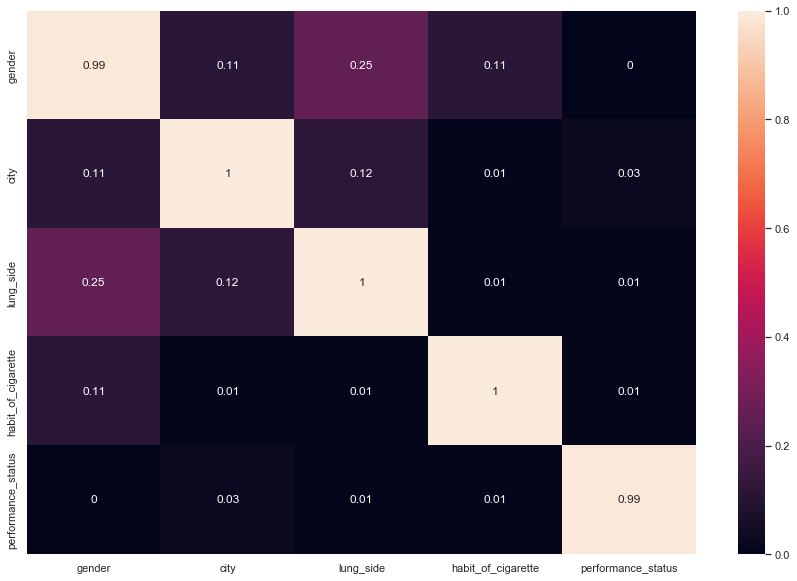

In [46]:
#corrMatrixD = df.select_dtypes(exclude='number').astype('int').apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1) # use of pd.factorize
# above done directly with Pearson, code's coming from: https://stackoverflow.com/questions/48035381/correlation-among-multiple-categorical-variables-pandas
# => gives almost same results

from scipy.stats import chi2_contingency
import numpy as np

# def fonction calculant le V de Cramer
def cramers_V(var1,var2) :
  crosstab = np.array(pd.crosstab(var1,var2, rownames = None, colnames = None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

rows= []

# selection uniquement des var de type categorielle
dfCat = df.select_dtypes(exclude='number')
for var1 in dfCat:
  col = []
  for var2 in dfCat :
    cramers = cramers_V(dfCat[var1], dfCat[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
corrMatrixD = pd.DataFrame(cramers_results, columns = dfCat.columns, index = dfCat.columns)

plt.rcParams['figure.figsize'] = [15, 10]
sns.heatmap(corrMatrixD, annot=True)
plt.show()

### Cramer's between Y and categorical variables

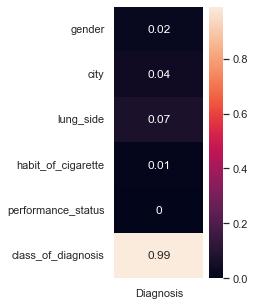

In [49]:
# table with cat var and class_of_diagnosis
dfYcat = pd.concat([df.select_dtypes(exclude='number'), df["class_of_diagnosis"]], axis = 1)
rows = []

for var in dfYcat:
  col = []
  cramers = cramers_V(dfYcat["class_of_diagnosis"], dfYcat[var]) # Cramer's V test
  col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
corrMatrixYcat = pd.DataFrame(cramers_results, columns=["Diagnosis"], index=dfYcat.columns)

plt.rcParams['figure.figsize'] = [2, 5]
sns.heatmap(corrMatrixYcat, annot=True)
plt.show()

## MCA and PCA analyses

### MCA

In [50]:
mca_res = MCA(dc, benzecri=False) # disabling benzecri correction 
print(mca_res.inertia, sum(mca_res.L)) # inertia

0.08132246440349405 0.08033162003957803


In [51]:
data = {'Iλ': pd.Series(mca_res.L)}

# 'Indicator Matrix', 'Benzecri Correction', 'Greenacre Correction'
columns = ['Iλ']
table2 = pd.DataFrame(data=data, columns=columns).fillna(0)
table2.index += 1
table2.loc['Σ'] = table2.sum()
table2.index.name = 'Factor'

table2.head() # eigen values (very low...)

,Iλ
Factor,
1,0.046411
2,0.016525
3,0.006550
4,0.004435
5,0.001393


### PCA

In [52]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing

In [54]:
X = df.select_dtypes(include='number')
scaler = preprocessing.StandardScaler().fit(X) # scaler

X_scaled = pd.DataFrame(scaler.transform(X)) # scaling X
y = df["class_of_diagnosis"]
X_scaled.head() 

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,-0.704904,0.396412,-0.621441,1.600137,3.939513,0.471849,0.682688,-1.253566,-0.408502,-0.167178,...,-0.428559,-2.503893,-2.272308,1.123760,0.242536,-2.591194,-1.213788,-1.044185,-1.334180,-0.648886
1,0.023319,0.396412,0.903452,-0.624946,-0.943190,0.471849,0.682688,0.797724,0.505760,-0.765693,...,13.115167,-1.486454,-1.397032,-1.561005,0.242536,0.385922,0.823867,0.957685,-0.980617,-0.648886
2,-2.343406,0.396412,-0.438454,-0.624946,-0.943190,-2.119322,-1.464797,-1.253566,-1.206667,0.730595,...,-0.071850,-2.503893,-2.272308,1.528314,0.242536,-2.591194,-1.213788,-1.044185,-0.936422,1.541104
3,-1.433127,0.396412,-1.231399,-0.624946,-0.518607,-2.119322,0.682688,0.797724,-0.449136,1.329110,...,-0.111069,0.675604,0.791159,-0.126678,0.242536,0.385922,-1.213788,-1.044185,-1.908719,-0.648886
4,-0.704904,0.396412,-1.231399,1.600137,-0.837044,0.471849,0.682688,-1.253566,-0.097943,-1.663465,...,-0.570495,-0.214655,-0.138822,0.167542,0.242536,0.385922,-1.213788,-1.044185,-2.350672,-0.648886


In [55]:
n_components = 13

#PCA
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

sum(pca.explained_variance_ratio_) # sum of the % of variance explained by earch of the selected components

0.7108491532232614

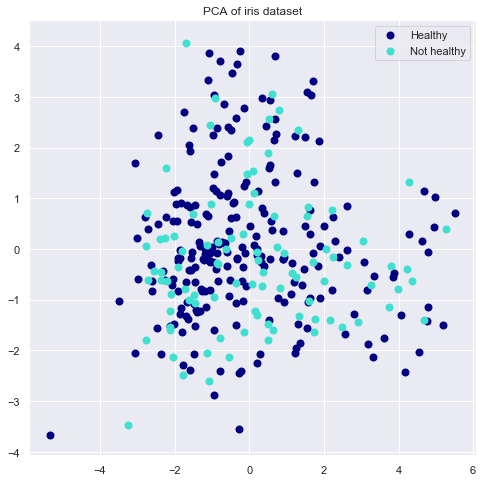

In [56]:
colors = ["navy", "turquoise"]#, "pink"]

plt.figure(figsize=(8, 8))
for color, i, target_name in zip(colors, [0, 1], np.array(["Healthy", "Not healthy"])):
    plt.scatter(
        X_pca[y == i, 0],
        X_pca[y == i, 1],
        color=color,
        lw=2,
        label=target_name,
    )

plt.title("PCA of iris dataset")
plt.legend(loc="best", shadow=False, scatterpoints=1)

plt.show() # again: not concluant

## Modelling

In [58]:
# modelisation modules
from sklearn import preprocessing
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler  

# plot configuration
plt.rcParams['figure.figsize'] = [10, 10]

In [59]:
# variables used for modelisation
print(dc.columns) # for now we keep variables in terms of dummys

Index(['age', 'asbestos_exposure', 'duration_of_asbestos_exposure', 'cytology',
       'duration_of_symptoms', 'dyspnoea', 'ache_on_chest', 'weakness',
       'white_blood', 'cell_count', 'hemoglobin', 'platelet_count',
       'sedimentation', 'blood_lactic_dehydrogenise', 'alkaline_phosphatise',
       'total_protein', 'albumin', 'glucose', 'pleural_lactic_dehydrogenise',
       'pleural_protein', 'pleural_albumin', 'pleural_glucose', 'dead_or_not',
       'pleural_effusion', 'pleural_thickness_on_tomography',
       'pleural_level_of_acidity', 'C_reactive_protein', 'gender_0',
       'gender_1', 'city_0', 'city_1', 'city_2', 'city_3', 'city_4', 'city_5',
       'city_6', 'city_7', 'city_8', 'lung_side_0', 'lung_side_1',
       'lung_side_2', 'habit_of_cigarette_0', 'habit_of_cigarette_1',
       'habit_of_cigarette_2', 'habit_of_cigarette_3', 'performance_status_0',
       'performance_status_1'],
      dtype='object')


In [60]:
dc.head()

,age,asbestos_exposure,duration_of_asbestos_exposure,cytology,duration_of_symptoms,dyspnoea,ache_on_chest,weakness,white_blood,cell_count,...,city_8,lung_side_0,lung_side_1,lung_side_2,habit_of_cigarette_0,habit_of_cigarette_1,habit_of_cigarette_2,habit_of_cigarette_3,performance_status_0,performance_status_1
0,47.0,1,20.0,1,24.0,1,1,0,8050.0,9,...,0,1,0,0,0,0,1,0,0,1
1,55.0,1,45.0,0,1.0,1,1,1,11200.0,7,...,0,1,0,0,0,0,0,1,1,0
2,29.0,1,23.0,0,1.0,0,0,0,5300.0,12,...,0,0,1,0,0,0,1,0,0,1
3,39.0,1,10.0,0,3.0,0,1,1,7910.0,14,...,0,1,0,0,1,0,0,0,0,1
4,47.0,1,10.0,1,1.5,1,1,0,9120.0,4,...,0,0,1,0,0,0,0,1,0,1


In [61]:
X = dc.copy()#.drop("class_of_diagnosis",axis=1).copy()
y = df["class_of_diagnosis"].copy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, shuffle=True)

In [62]:
X_train.dtypes

age                                float64
asbestos_exposure                    int64
duration_of_asbestos_exposure      float64
cytology                             int64
duration_of_symptoms               float64
dyspnoea                             int64
ache_on_chest                        int64
weakness                             int64
white_blood                        float64
cell_count                           int64
hemoglobin                           int64
platelet_count                     float64
sedimentation                      float64
blood_lactic_dehydrogenise         float64
alkaline_phosphatise               float64
total_protein                      float64
albumin                            float64
glucose                            float64
pleural_lactic_dehydrogenise       float64
pleural_protein                    float64
pleural_albumin                    float64
pleural_glucose                    float64
dead_or_not                          int64
pleural_eff

### 1st test: Multi-layer perceptron algorithm

In [78]:
scaler = StandardScaler()  
scaler.fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

clf_mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,
                        hidden_layer_sizes=(5, 2), random_state=1)
clf_mlp.fit(X_train_s, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [79]:
pred = clf_mlp.predict(X_test_s)

In [80]:
# Use score method to get accuracy of model
score = clf_mlp.score(X_test_s, y_test)
print(score)

0.6923076923076923


In [81]:
clf_mlp.predict_proba(X_test_s)

array([[6.86650344e-01, 3.13349656e-01],
       [0.00000000e+00, 1.00000000e+00],
       [0.00000000e+00, 1.00000000e+00],
       [6.86650344e-01, 3.13349656e-01],
       [6.86650344e-01, 3.13349656e-01],
       [1.95399252e-14, 1.00000000e+00],
       [3.56718321e-01, 6.43281679e-01],
       [1.00000000e+00, 3.89740246e-31],
       [1.00000000e+00, 1.50656923e-18],
       [9.99971564e-01, 2.84363311e-05],
       [0.00000000e+00, 1.00000000e+00],
       [6.86650344e-01, 3.13349656e-01],
       [6.86650344e-01, 3.13349656e-01],
       [1.00000000e+00, 7.37346996e-23],
       [1.00000000e+00, 1.32183882e-35],
       [1.00000000e+00, 2.67537462e-70],
       [1.00000000e+00, 2.59898877e-47],
       [6.86650344e-01, 3.13349656e-01],
       [1.00000000e+00, 1.34152228e-12],
       [0.00000000e+00, 1.00000000e+00],
       [7.26352312e-12, 1.00000000e+00],
       [6.86650344e-01, 3.13349656e-01],
       [1.55431223e-15, 1.00000000e+00],
       [1.00000000e+00, 2.92659727e-34],
       [1.000000

In [82]:
cm = metrics.confusion_matrix(y_test, pred)

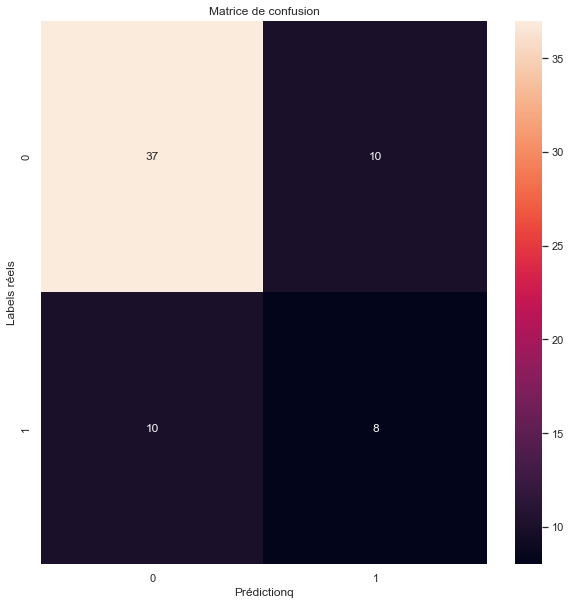

In [83]:
ax = plt.subplot()
sns.heatmap(cm,annot=True,fmt="d") 
ax.set_xlabel('Prédictionq'); ax.set_ylabel('Labels réels'); 
ax.set_title('Matrice de confusion'); 
plt.show() # not bad

In [84]:
ml_models = []
ml_models.append(("MLP:", score))

### Hierarchical modelling

### Recursive feature selection and Decision Tree

In [71]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
from matplotlib import pyplot

>10 0.635 (0.095)
>11 0.666 (0.082)
>12 0.674 (0.084)
>13 0.672 (0.075)
>14 0.653 (0.068)
>15 0.691 (0.073)
>16 0.680 (0.083)
>17 0.674 (0.082)
>18 0.666 (0.083)
>19 0.680 (0.097)
>20 0.673 (0.081)
>21 0.688 (0.094)
>22 0.687 (0.094)
>23 0.674 (0.086)
>24 0.674 (0.088)
>25 0.681 (0.097)
>26 0.678 (0.085)
>27 0.687 (0.089)
>28 0.677 (0.097)
>29 0.684 (0.090)
>30 0.683 (0.088)


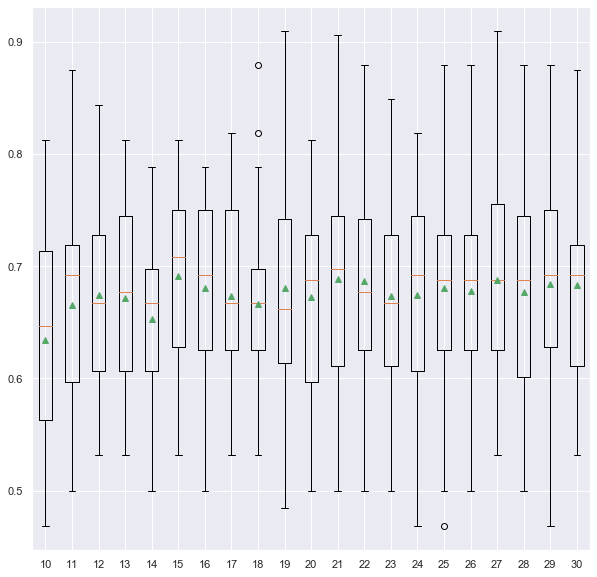

In [72]:
# get a list of models to evaluate
def get_models():
    models = dict()
    for i in range(10, 31):
        rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
        model = DecisionTreeClassifier()
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores
 
# define dataset
#X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show() # not significant changes in score when increasing the number of variables

In [73]:
# create pipeline
rfe = RFECV(estimator=DecisionTreeClassifier())
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=50, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

# fit RFE
rfe.fit(X_train.values, y_train.values)
# summarize all features
for i in range(X_train.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Accuracy: 0.611 (0.194)
Column: 0, Selected True, Rank: 1.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected True, Rank: 1.000
Column: 9, Selected True, Rank: 1.000
Column: 10, Selected True, Rank: 1.000
Column: 11, Selected True, Rank: 1.000
Column: 12, Selected True, Rank: 1.000
Column: 13, Selected True, Rank: 1.000
Column: 14, Selected True, Rank: 1.000
Column: 15, Selected True, Rank: 1.000
Column: 16, Selected True, Rank: 1.000
Column: 17, Selected False, Rank: 4.000
Column: 18, Selected True, Rank: 1.000
Column: 19, Selected True, Rank: 1.000
Column: 20, Selected True, Rank: 1.000
Column: 21, Selected True, Rank: 1.000
Column: 22, Selected False, Rank: 14.000
Column: 23, Selected False, Rank: 15.000
Column: 24, Selected True, Rank: 1.000
Column

In [85]:
score = rfe.score(X_test.values, y_test.values)
print(score)

0.7384615384615385


/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but RFECV was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


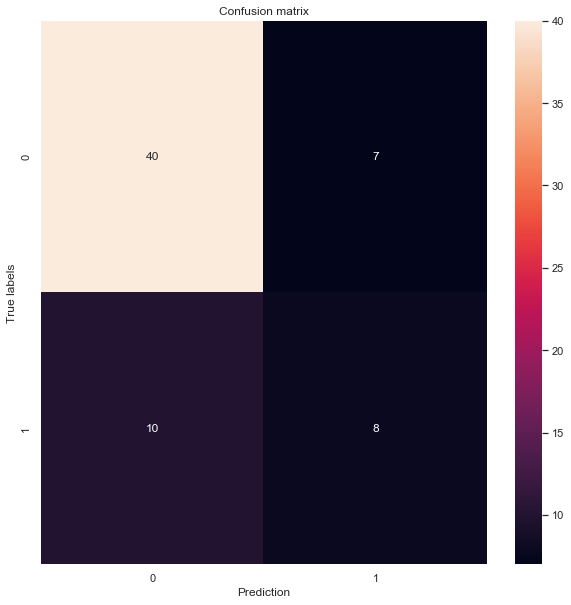

In [75]:
rfe_pred = rfe.predict(X_test)

cm_log = metrics.confusion_matrix(y_test, rfe_pred)

ax = plt.subplot()
sns.heatmap(cm_log,annot=True,fmt="d") 
ax.set_xlabel('Prediction'); ax.set_ylabel('True labels'); 
ax.set_title('Confusion matrix'); 
plt.show()

In [86]:
ml_models.append(("CART:", score))

### Régression logistique

In [87]:
logistic = LogisticRegression(max_iter=10000)
logistic.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [88]:
pred = logistic.predict(X_test)

In [89]:
# Use score method to get accuracy of model
score = logistic.score(X_test, y_test)
print(score)

0.7230769230769231


In [90]:
cm_log = metrics.confusion_matrix(y_test, pred)

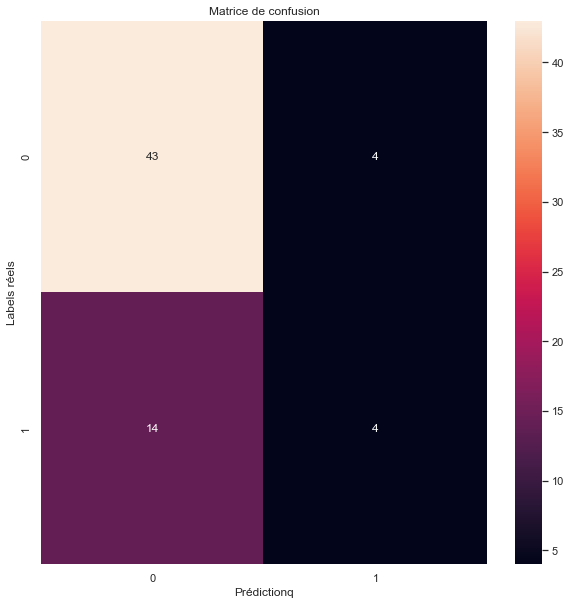

In [91]:
ax = plt.subplot()
sns.heatmap(cm_log,annot=True,fmt="d") 
ax.set_xlabel('Prédictionq'); ax.set_ylabel('Labels réels'); 
ax.set_title('Matrice de confusion'); 
plt.show()

### Random forest

In [93]:
# RF (perhaps will improve decition tree performance)
rf = RandomForestClassifier(n_estimators = 150,
                           n_jobs = 10,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42)   

In [94]:
rf.fit(X_train.values, y_train.values)

RandomForestClassifier(n_estimators=150, n_jobs=10, oob_score=True,
                       random_state=42)

#### Evaluation des performances

In [95]:
# modules complementaires
import shap
from sklearn.inspection import permutation_importance

In [96]:
print('R^2 Training Score: {:.2f} \nOOB Score: {:.2f} \nR^2 Validation Score: {:.2f}'.format(rf.score(X_train.values, y_train.values), 
                                                                                             rf.oob_score_,
                                                                                             rf.score(X_test.values, y_test.values))) 

R^2 Training Score: 1.00 
OOB Score: 0.74 
R^2 Validation Score: 0.77


In [97]:
rf.feature_importances_

array([4.70805951e-02, 7.33927072e-03, 4.26725715e-02, 6.58609946e-03,
       5.09623419e-02, 7.42237945e-03, 1.00741452e-02, 7.82340685e-03,
       3.39424289e-02, 3.73919993e-02, 1.02940022e-02, 6.33015398e-02,
       4.58138263e-02, 4.84363693e-02, 4.53261245e-02, 3.83731571e-02,
       3.79501610e-02, 4.64594022e-02, 4.90455612e-02, 3.73214286e-02,
       3.88127265e-02, 4.34717405e-02, 2.30428013e-03, 5.32641298e-03,
       8.77910296e-03, 6.62604967e-03, 5.16409097e-02, 1.05118824e-02,
       1.30707792e-02, 1.11383504e-02, 7.33651370e-03, 8.28880398e-03,
       1.49242031e-02, 3.07517813e-03, 5.56630131e-05, 7.47445038e-03,
       1.03821033e-03, 1.88798309e-04, 1.03856272e-02, 1.40570039e-02,
       2.71760555e-02, 8.77464519e-03, 4.38454087e-03, 7.04827160e-03,
       7.05936242e-03, 5.33057139e-03, 8.10305605e-03])

In [98]:
df_meso = pd.concat([dc,df['class_of_diagnosis']],axis=1).loc[df['class_of_diagnosis'] == 1]

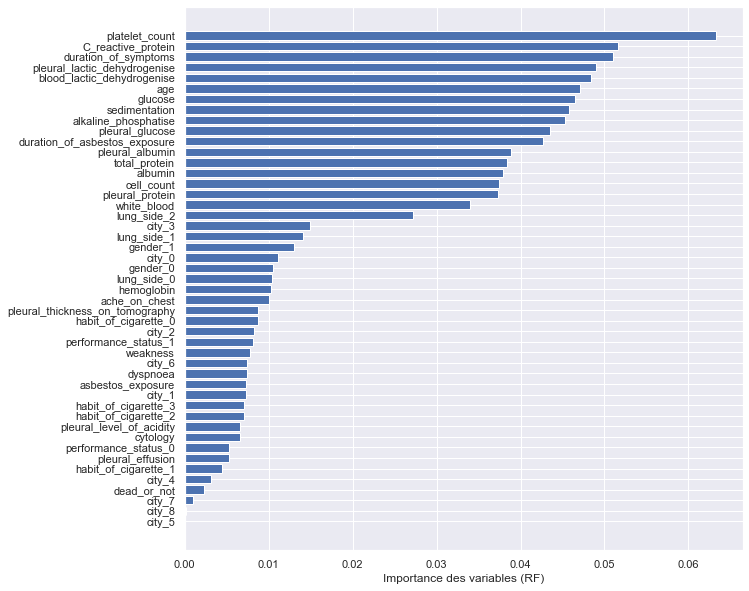

In [99]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(df_meso.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Importance des variables (RF)")
plt.show()

In [100]:
perm_importance = permutation_importance(rf, X_test.values, y_test.values)

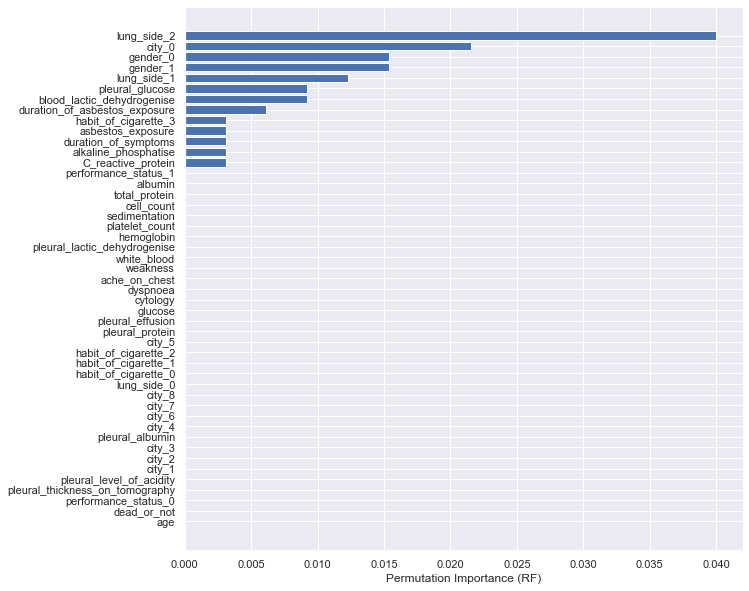

In [101]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(df_meso.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance (RF)")
plt.show()

In [102]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test.values)

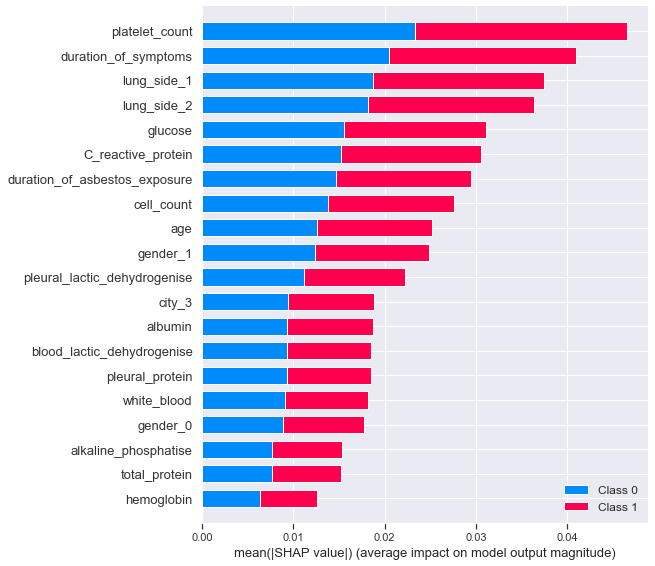

In [103]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

Les variables avec le plus d'influence d'après les 3 critères utilisés ci-dessus sont:

* PLT
* gender_1
* glucose
* age2
* C_reactive_protein
* are
* duration_of_asbestos_exposure
* duration_of_symptoms

In [104]:
# calcul du score
score = rf.score(X_test.values, y_test.values)
print(score)

0.7692307692307693


In [105]:
# predictions
pred = rf.predict(X_test.values)
print(metrics.classification_report(y_test.values, pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86        47
           1       1.00      0.17      0.29        18

    accuracy                           0.77        65
   macro avg       0.88      0.58      0.57        65
weighted avg       0.83      0.77      0.70        65



In [106]:
# matrice de confusion
cm = metrics.confusion_matrix(y_test, pred)

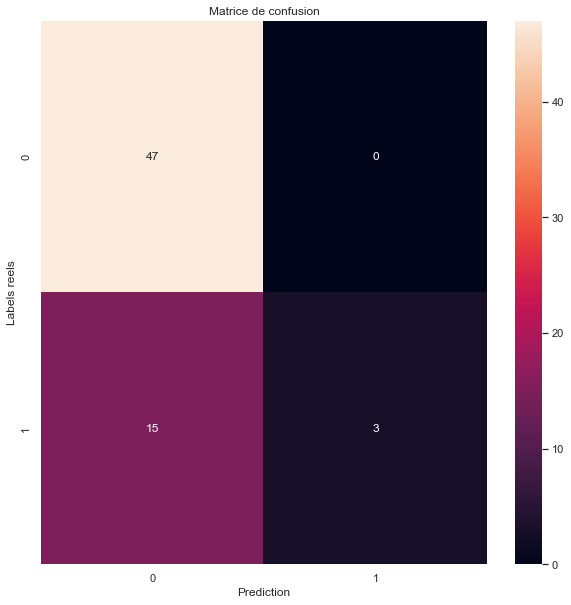

In [107]:
ax = plt.subplot()
sns.heatmap(cm,annot=True,fmt="d") 
ax.set_xlabel('Prediction');ax.set_ylabel('Labels reels'); 
ax.set_title('Matrice de confusion'); 
plt.show()

### AdaBoost

In [109]:
from sklearn.ensemble import AdaBoostClassifier # AdaBoost stuff
from sklearn.model_selection import GridSearchCV

In [110]:
clf_ada = AdaBoostClassifier(n_estimators=100, random_state=0)

clf_ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=0)

In [111]:
# calcul du score
score = clf_ada.score(X_test, y_test)
print(score)

0.7230769230769231


In [112]:
# predictions
pred = clf_ada.predict(X_test)
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.78      0.85      0.82        47
           1       0.50      0.39      0.44        18

    accuracy                           0.72        65
   macro avg       0.64      0.62      0.63        65
weighted avg       0.71      0.72      0.71        65



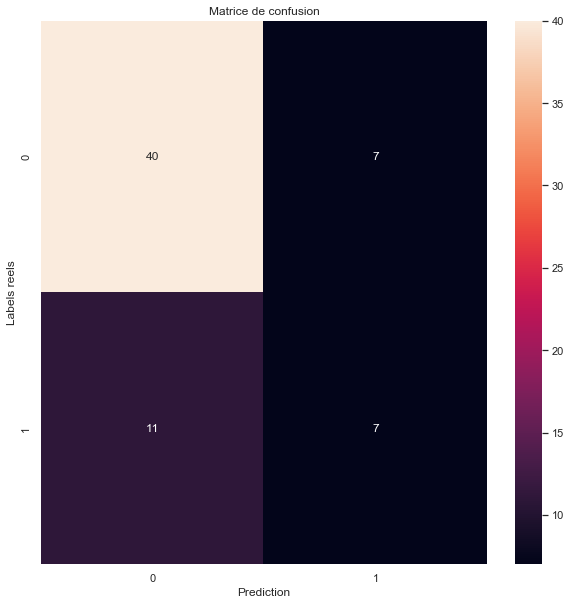

In [113]:
# matrice de confusion
cm = metrics.confusion_matrix(y_test, pred)

ax = plt.subplot()
sns.heatmap(cm,annot=True,fmt="d") 
ax.set_xlabel('Prediction');ax.set_ylabel('Labels reels'); 
ax.set_title('Matrice de confusion'); 
plt.show()

### Comparison of scores
Evaluate a score by cross-validation.

In [131]:
ml_models = []
ml_models.append(("CART", DecisionTreeClassifier()))
ml_models.append(("LR", LogisticRegression(max_iter=10000)))
ml_models.append(("RF", RandomForestClassifier(n_estimators = 150,
                           n_jobs = 10,
                           oob_score = True,
                           bootstrap = True,
                           random_state = 42) ))
ml_models.append(("AdaBoost", AdaBoostClassifier(n_estimators=100, random_state=0)))

CART: 0.642857 (0.161484)
LR: 0.642857 (0.161484)
RF: 0.704762 (0.178873)
AdaBoost: 0.652381 (0.188442)
MLP: 0.592857 (0.187310)


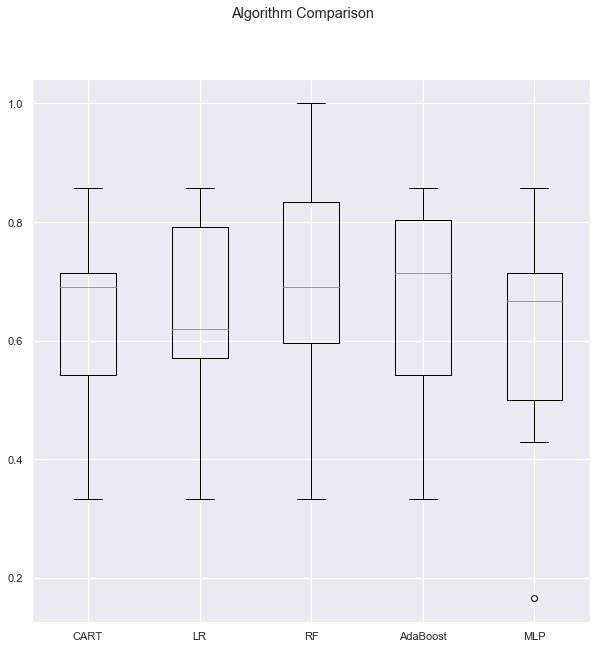

In [132]:
#import matplotlib.pyplot as plt
from sklearn import model_selection

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in ml_models:
    model.fit(X_train.values, y_train)
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_test.values, y_test, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# for MLP Classifier since it needs scaled X_train
model = MLPClassifier(solver='lbfgs', alpha=1e-5,
                        hidden_layer_sizes=(5, 2), random_state=1)
model.fit(X_train_s, y_train)
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_test_s, y_test, cv=kfold, scoring=scoring)
results.append(cv_results)
names.append("MLP")
msg = "%s: %f (%f)" % ("MLP", cv_results.mean(), cv_results.std())
print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

RF is doing much better than other classifiers.

#### Hyperparameters tuning for RF algorithm (not concluant)

In [369]:
RandomForestClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [370]:
# module necessaire
from pprint import pprint
import numpy as np

param_grid = {
    'n_estimators': range(50, 300, 50),
    'max_features': ['auto', 'sqrt'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
pprint(param_grid)

optimal_params = GridSearchCV(
    estimator=RandomForestClassifier(n_jobs=10, random_state=42),
    param_grid=param_grid,
#     scoring = 'roc_auc',## For more scoring metics see: 
        ## https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    verbose=0, # NOTE: If you want to see what Grid Search is doing, set verbose=2
    n_jobs=10,
    cv=3
)

optimal_params.fit(X_train, y_train)
print(optimal_params.best_params_)

{'bootstrap': [True, False],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': range(50, 300, 50)}
{'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 250}


In [112]:
rf_opt = RandomForestClassifier(bootstrap=False,
                                n_estimators=50, 
                                min_samples_leaf=2,
                                min_samples_split=5,
                                max_features='auto',
                                random_state=42)
rf_opt.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=50, random_state=42)

In [113]:
# calcul du score
score = rf_opt.score(X_test, y_test)
print(score)

0.6923076923076923


In [114]:
# predictions
pred = rf_opt.predict(X_test)
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.68      0.98      0.80        42
           1       0.80      0.17      0.29        23

    accuracy                           0.69        65
   macro avg       0.74      0.58      0.54        65
weighted avg       0.72      0.69      0.62        65



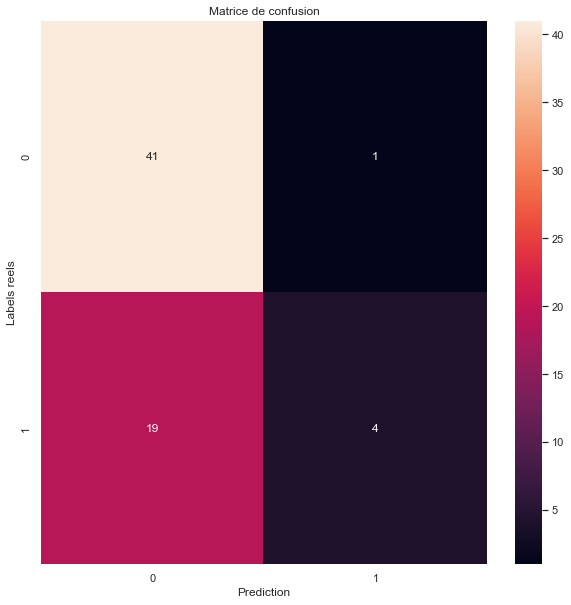

In [115]:
# matrice de confusion
cm = metrics.confusion_matrix(y_test, pred)

ax = plt.subplot()
sns.heatmap(cm,annot=True,fmt="d") 
ax.set_xlabel('Prediction');ax.set_ylabel('Labels reels'); 
ax.set_title('Matrice de confusion'); 
plt.show()